# HitPredict - Machine Learning Preprocessing
Ein Projekt für 'Grundlagen und Methoden der Informatik für Wirtschaftswissenschaften' an der Universität St.Gallen (2025)

Autoren: Ruben Cardell, Adam Bisharat, Helena Häußler, Colin Wirth

---

- In diesem Notebook wurden die textbasierten Metriken anhand der zuvor abgerufenen Lyrics für den Datensatz berechnet.
- Achtung: Die Ausführung der Zellen war nicht immer chronologisch.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

tqdm.pandas()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "drive/MyDrive/CS Gruppenarbeit/data/"

Mounted at /content/drive


## **General**

In [ ]:
# Export als CSV
df = pd.read_csv(path + "spotify_data_lyrics.csv", index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 0 to 1473395
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  tempo

Text(0.5, 1.0, 'Popularities of Songs with Lyrics')

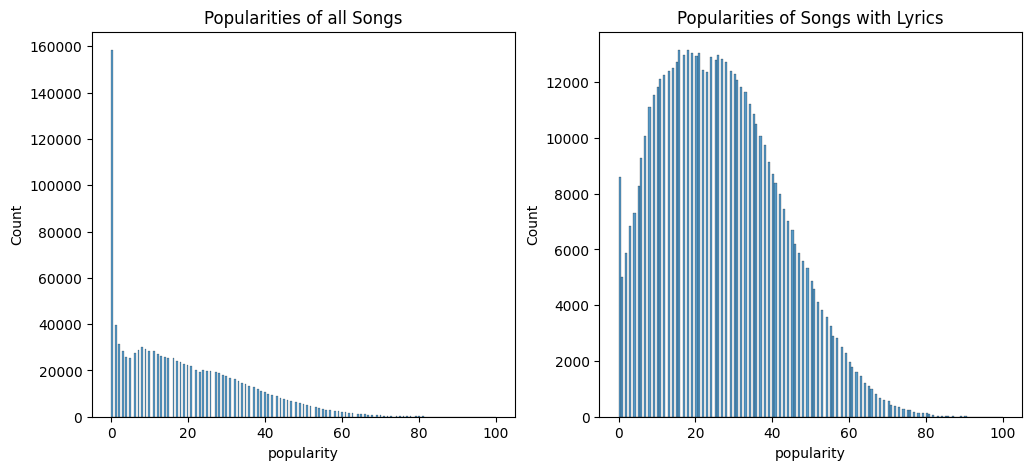

In [ ]:
# Histogramm der Popularity-Scores aller Songs, sowie nur der Songs, für die Lyrics abgerufen werden konnten
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["popularity"], ax=axes[0])
axes[0].set_title("Popularities of all Songs")

sns.histplot(df["popularity"], ax=axes[1])
axes[1].set_title("Popularities of Songs with Lyrics")

In [ ]:
df = df.dropna()

## **Import / Export**

In [ ]:
# Export als CSV
df = pd.read_csv(path + "spotify_data_lyrics_repetition_readability_sentiment_explicitness.csv", index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566692 entries, 0 to 1473395
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   artist_name             566692 non-null  object 
 1   track_name              566692 non-null  object 
 2   track_id                566692 non-null  object 
 3   popularity              566692 non-null  int64  
 4   year                    566692 non-null  int64  
 5   genre                   566692 non-null  object 
 6   danceability            566692 non-null  float64
 7   energy                  566692 non-null  float64
 8   key                     566692 non-null  int64  
 9   loudness                566692 non-null  float64
 10  mode                    566692 non-null  int64  
 11  speechiness             566692 non-null  float64
 12  acousticness            566692 non-null  float64
 13  instrumentalness        566692 non-null  float64
 14  liveness                

In [ ]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,tempo,duration_ms,time_signature,lyrics,album_name,repetition,readability,sentiment_polarity,sentiment_subjectivity,explicitness
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,...,133.406,240166,3,When I look into your eyes\nIt's like watching...,Love Is a Four Letter Word,0.016393,12.43,0.208694,0.515260,0.081005
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,...,140.182,216387,4,93 million miles from the sun\nPeople get read...,Love Is a Four Letter Word,0.022727,15.93,0.336929,0.609429,0.040401
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,...,139.832,158960,4,There are moments in this life when you can't ...,Where the Mountain Meets the Valley,0.023256,6.65,0.056250,0.717361,0.223699
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,...,204.961,304293,4,You got a fast car\nI want a ticket to anywher...,"Cover Sessions, Vol. 2",0.014670,25.44,0.174539,0.535135,0.269429
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,...,171.864,244320,4,"You never see clearly, 'til you stop cryin'\nI...",The Daylight EP,0.028226,11.23,-0.044816,0.362346,0.393659


In [ ]:
# Export als CSV
df.to_csv(path + "spotify_data_lyrics_repetition_readability_sentiment_explicitness.csv")

### **Repetition**

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def ngram_repetition(text):
    """
    Berechnet die Repetition anhand von 3er N-Grammen im Text.
    Verhältnis der Anzahl an identischen Trigrammen zur Gesamtzahl von Trigrammen.
    """
    blob = TextBlob(text)
    ngrams = blob.ngrams(3)  # Trigramme erzeugen

    if not ngrams:
        return 0.0

    ngram_counts = Counter(map(tuple, ngrams))  # Anzahl der Trigramme
    most_common_count = max(ngram_counts.values())  # Häufigstes identisches Trigramm
    total_ngrams = sum(ngram_counts.values())  # Gesamtzahl aller erzeugten Trigramme
    return most_common_count / total_ngrams  # Verhältnis des häufigsten Trigramms zur Gesamtzahl der Trigramme

In [ ]:
df['repetition'] = df['lyrics'].apply(ngram_repetition)

<ipython-input-24-48588f55f671>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['repetition'] = df_full['lyrics'].apply(ngram_repetition)


In [ ]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,album_name,repetition
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,...,0.6940,0.000000,0.1150,0.139,133.406,240166,3,When I look into your eyes\nIt's like watching...,Love Is a Four Letter Word,0.016393
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,...,0.4770,0.000014,0.0974,0.515,140.182,216387,4,93 million miles from the sun\nPeople get read...,Love Is a Four Letter Word,0.022727
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,...,0.3380,0.000050,0.0895,0.145,139.832,158960,4,There are moments in this life when you can't ...,Where the Mountain Meets the Valley,0.023256
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,...,0.8070,0.000000,0.0797,0.508,204.961,304293,4,You got a fast car\nI want a ticket to anywher...,"Cover Sessions, Vol. 2",0.014670
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,...,0.0726,0.019300,0.1100,0.217,171.864,244320,4,"You never see clearly, 'til you stop cryin'\nI...",The Daylight EP,0.028226


In [ ]:
# Test-Anzeige von Song mit sehr repetitiven Lyrics (und tiefer Bedeutung)
print(df.loc[1429202]["lyrics"])

What the hell kind of name is soap
Na na na na na na na na na na na na
Na na na na na na na na na na na na na na
Na na na na na na na na na na na na na na
Na na na na na na na na na na na na na na
Na na na na na na na na na na na na na na na; na na na na


## **Readability**

In [ ]:
!pip install textstat

In [ ]:
import textstat

In [ ]:
# Ermittelt die Lesbarkeit des Textes via Dale-Chall-Formel.
# Mass für die Verständnisschwierigkeiten beim Lesen eines Textes.

df["readability"] = df["lyrics"].progress_apply(textstat.dale_chall_readability_score)

100%|██████████| 566692/566692 [05:13<00:00, 1809.76it/s]


In [ ]:
# Obere Grenze bei 30, um Ausreisser für das ML zu vermeiden
df.loc[df["readability"] > 30, "readability"] = 30.0

<Axes: xlabel='readability', ylabel='Count'>

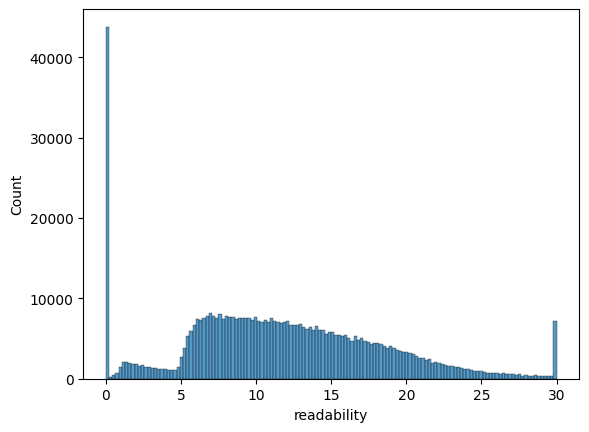

In [ ]:
# Visualisierung als Histogramm
sns.histplot(df["readability"])

## **Sentiment**

In [ ]:
from textblob import TextBlob

In [ ]:
def analyze_sentiment(text):
    """
    Bestimmt Polarität und Subjektivität des Textes.
    Polarität: Beschreibt positive oder negative Stimmung.
    Subjektivität: Anteil der persönlichen Meinung.
    """
    blob = TextBlob(text)

    return pd.Series({
        "sentiment_polarity": blob.sentiment.polarity,
        "sentiment_subjectivity": blob.sentiment.subjectivity
    })

In [ ]:
df[["sentiment_polarity", "sentiment_subjectivity"]] = df["lyrics"].progress_apply(analyze_sentiment)  # Dauert 20 Minuten

100%|██████████| 566692/566692 [18:34<00:00, 508.49it/s]


In [ ]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,valence,tempo,duration_ms,time_signature,lyrics,album_name,repetition,readability,sentiment_polarity,sentiment_subjectivity
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,...,0.139,133.406,240166,3,When I look into your eyes\nIt's like watching...,Love Is a Four Letter Word,0.016393,-42.04,0.208694,0.515260
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,...,0.515,140.182,216387,4,93 million miles from the sun\nPeople get read...,Love Is a Four Letter Word,0.022727,-128.48,0.336929,0.609429
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,...,0.145,139.832,158960,4,There are moments in this life when you can't ...,Where the Mountain Meets the Valley,0.023256,60.96,0.056250,0.717361
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,...,0.508,204.961,304293,4,You got a fast car\nI want a ticket to anywher...,"Cover Sessions, Vol. 2",0.014670,-311.86,0.174539,0.535135
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,...,0.217,171.864,244320,4,"You never see clearly, 'til you stop cryin'\nI...",The Daylight EP,0.028226,-21.57,-0.044816,0.362346


<Axes: xlabel='sentiment_polarity', ylabel='Count'>

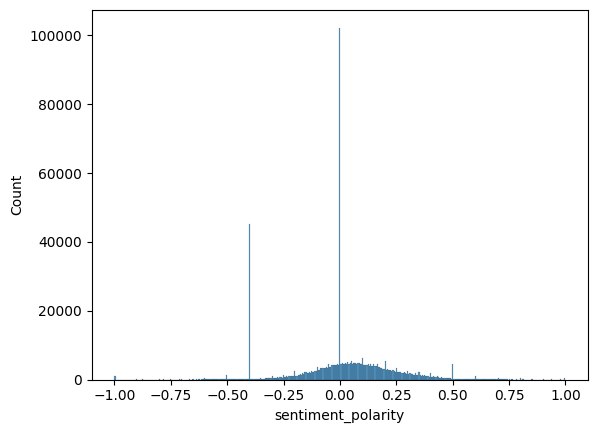

In [ ]:
# Visualisierung als Histogramm
sns.histplot(df["sentiment_polarity"])

## **Explicitness**

In [ ]:
!pip install alt-profanity-check

In [ ]:
from profanity_check import predict_prob

In [ ]:
# Berechnet die Wahrscheinlichkeit für explizite Inhalte im Text.
# Vorhandensein von Obszönität oder anstössiger Sprache.

df['explicitness'] = predict_prob(df['lyrics'].tolist())

<Axes: xlabel='explicitness', ylabel='Count'>

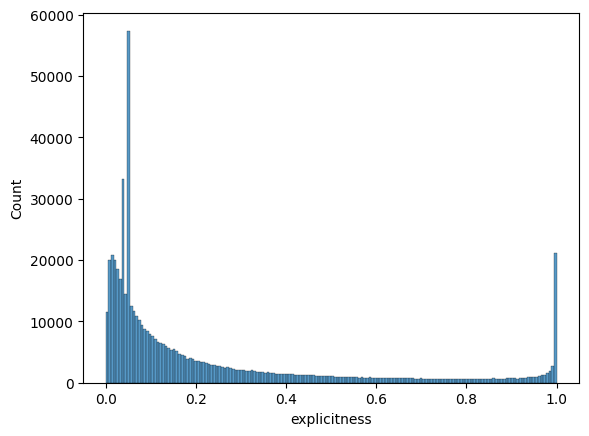

In [ ]:
# Visualisierung als Histogramm
sns.histplot(df["explicitness"])